In [1]:
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder, MinMaxScaler

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
import lightgbm as lgb

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from mlxtend.frequent_patterns import apriori, association_rules

from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest

#importei isso ai tudo pois fui testando abordagens diversas 

In [2]:
train_df = pd.read_csv('train.csv')

In [3]:
print("Informações gerais:\n")
print(train_df.info())

Informações gerais:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   

In [4]:
print("\nHead\n:")
print(train_df.head())


Head
:
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008     

In [5]:
print("\nEstatisticas:")
print(train_df.describe())


Estatisticas:
                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207  

In [6]:
print("\nDados categoricos:")
print(train_df.describe(include=['object']))


Dados categoricos:
       MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      1460   1460    91     1460        1460      1460      1460   
unique        5      2     2        4           4         2         5   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq       1151   1454    50      925        1311      1459      1052   

       LandSlope Neighborhood Condition1  ... GarageType GarageFinish  \
count       1460         1460       1460  ...       1379         1379   
unique         3           25          9  ...          6            3   
top          Gtl        NAmes       Norm  ...     Attchd          Unf   
freq        1382          225       1260  ...        870          605   

       GarageQual GarageCond PavedDrive PoolQC  Fence MiscFeature SaleType  \
count        1379       1379       1460      7    281          54     1460   
unique          5          5          3      3      4           4        9   
top           

In [7]:
print("\nVerificação de NaNs\n")
print(train_df.isnull().sum())



Verificação de NaNs

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


In [8]:
#checagem de vals unicos nas colunas categoricas

categorical_columns = train_df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"Valores únicos em {col}: {train_df[col].nunique()}")

Valores únicos em MSZoning: 5
Valores únicos em Street: 2
Valores únicos em Alley: 2
Valores únicos em LotShape: 4
Valores únicos em LandContour: 4
Valores únicos em Utilities: 2
Valores únicos em LotConfig: 5
Valores únicos em LandSlope: 3
Valores únicos em Neighborhood: 25
Valores únicos em Condition1: 9
Valores únicos em Condition2: 8
Valores únicos em BldgType: 5
Valores únicos em HouseStyle: 8
Valores únicos em RoofStyle: 6
Valores únicos em RoofMatl: 8
Valores únicos em Exterior1st: 15
Valores únicos em Exterior2nd: 16
Valores únicos em MasVnrType: 3
Valores únicos em ExterQual: 4
Valores únicos em ExterCond: 5
Valores únicos em Foundation: 6
Valores únicos em BsmtQual: 4
Valores únicos em BsmtCond: 4
Valores únicos em BsmtExposure: 4
Valores únicos em BsmtFinType1: 6
Valores únicos em BsmtFinType2: 6
Valores únicos em Heating: 6
Valores únicos em HeatingQC: 5
Valores únicos em CentralAir: 2
Valores únicos em Electrical: 5
Valores únicos em KitchenQual: 4
Valores únicos em Functi

In [9]:
#procurando por numeros duplicados
num_duplicates = train_df.duplicated().sum()
if num_duplicates > 0:
    print(f"Existem {num_duplicates} linhas duplicadas no conjunto de dados.")
else:
    print("0 duplicados")

0 duplicados


In [11]:
missing_data = train_df.isnull().sum()
print("Colunas com valores inexistentes:")
print(missing_data[missing_data > 0])

Colunas com valores inexistentes:
LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


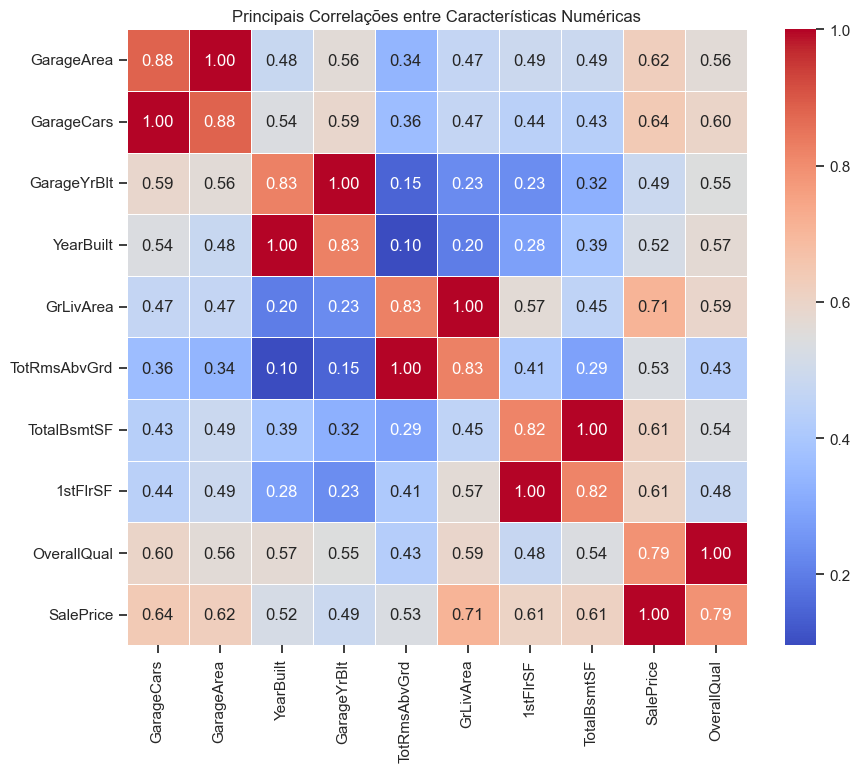

In [13]:
colunas_numericas = train_df.select_dtypes(include=np.number).columns.tolist()

# Calcula a matriz de correlação
matriz_correlacao = train_df[colunas_numericas].corr()

# Obtém as principais correlações (valor absoluto), excluindo auto-correlação (diagonal)
top_corr = (matriz_correlacao.abs().stack().sort_values(ascending=False)
            .reset_index().rename(columns={0: 'Correlação', 'level_0': 'Feature 1', 'level_1': 'Feature 2'}))
top_corr = top_corr[top_corr['Feature 1'] != top_corr['Feature 2']]  # Exclui auto-correlações

# 10 principais correlacoes
top_corr = top_corr.head(10)

# Plotagem
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacao.loc[top_corr['Feature 1'], top_corr['Feature 2']], annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Principais Correlações entre Características Numéricas')
plt.show()


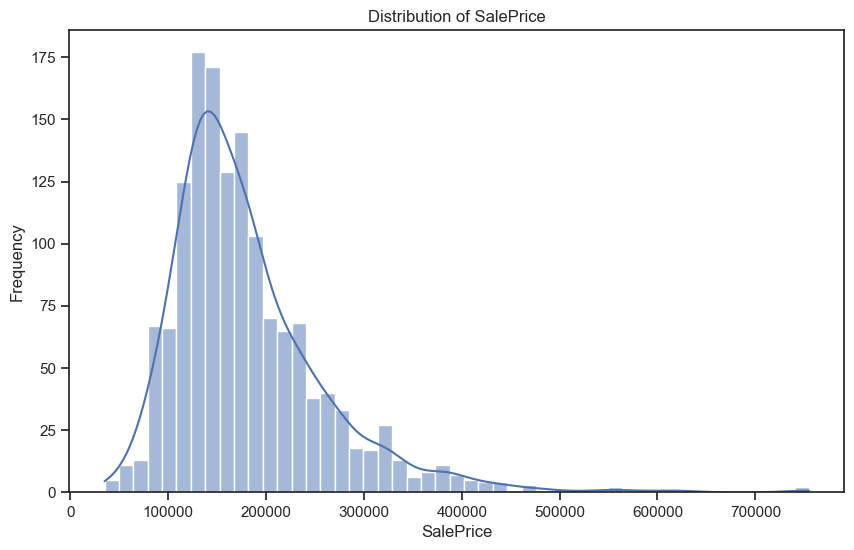

In [17]:
#distribuicao do SalePrice
plt.figure(figsize=(10, 6))
sns.histplot(train_df['SalePrice'], kde=True)
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

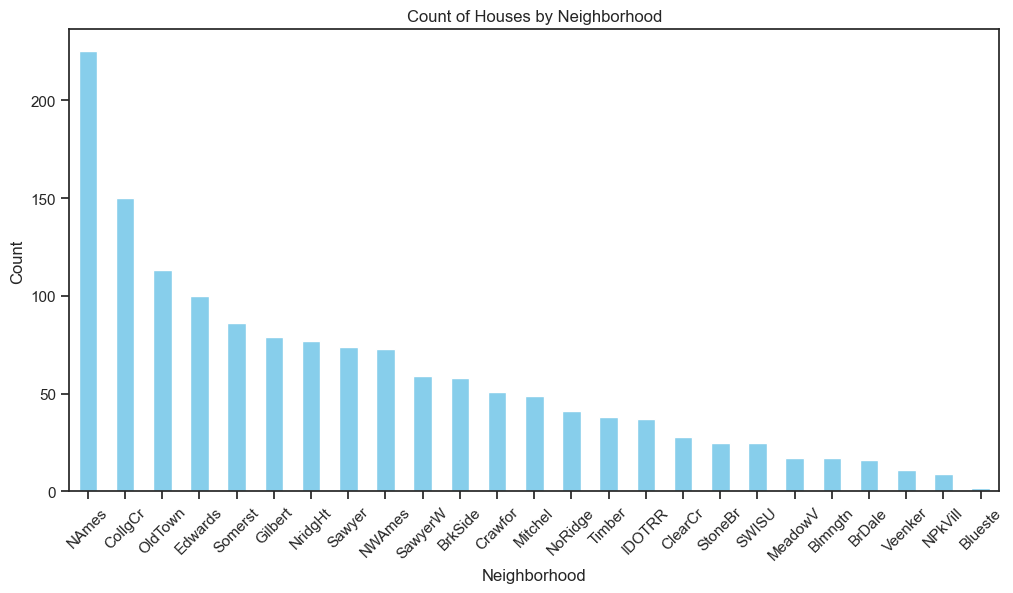

In [18]:
neighborhood_counts = train_df['Neighborhood'].value_counts()

plt.figure(figsize=(12, 6))
neighborhood_counts.plot(kind='bar', color='skyblue')
plt.title('Count of Houses by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


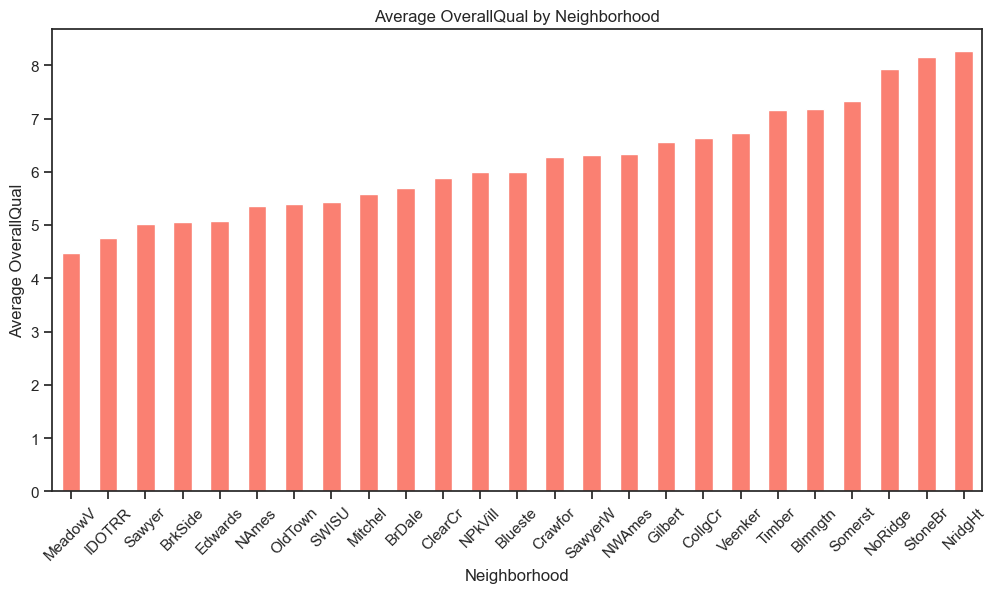

In [19]:
# Calculando qualidade de bairro pra ver se coincide com o numero de casas por bairro
avg_quality_by_neighborhood = train_df.groupby('Neighborhood')['OverallQual'].mean().sort_values()

plt.figure(figsize=(12, 6))
avg_quality_by_neighborhood.plot(kind='bar', color='salmon')
plt.title('Average OverallQual by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Average OverallQual')
plt.xticks(rotation=45)
plt.show()


In [ ]:
#bascimante esse notebook foi pra uma EDA, conhecer as colunas e valores, ver se achava alguma correlação pra usar